In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [208]:
df=pd.read_csv("Universities (1).csv")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [210]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


<AxesSubplot:xlabel='SFRatio'>

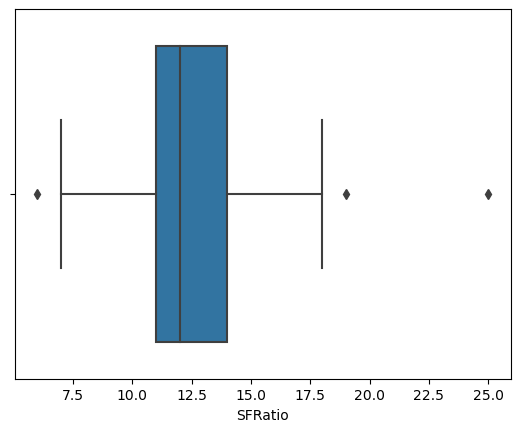

In [211]:
sns.boxplot(df["SFRatio"])

In [212]:
df.corr().style.background_gradient() 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.922522,-0.885850,-0.812552,0.778976,0.747712
Top10,0.922522,1.000000,-0.859181,-0.643435,0.611467,0.745942
Accept,-0.885850,-0.859181,1.000000,0.631664,-0.558439,-0.819550
SFRatio,-0.812552,-0.643435,0.631664,1.000000,-0.781839,-0.560922
Expenses,0.778976,0.611467,-0.558439,-0.781839,1.000000,0.393591
GradRate,0.747712,0.745942,-0.819550,-0.560922,0.393591,1.000000


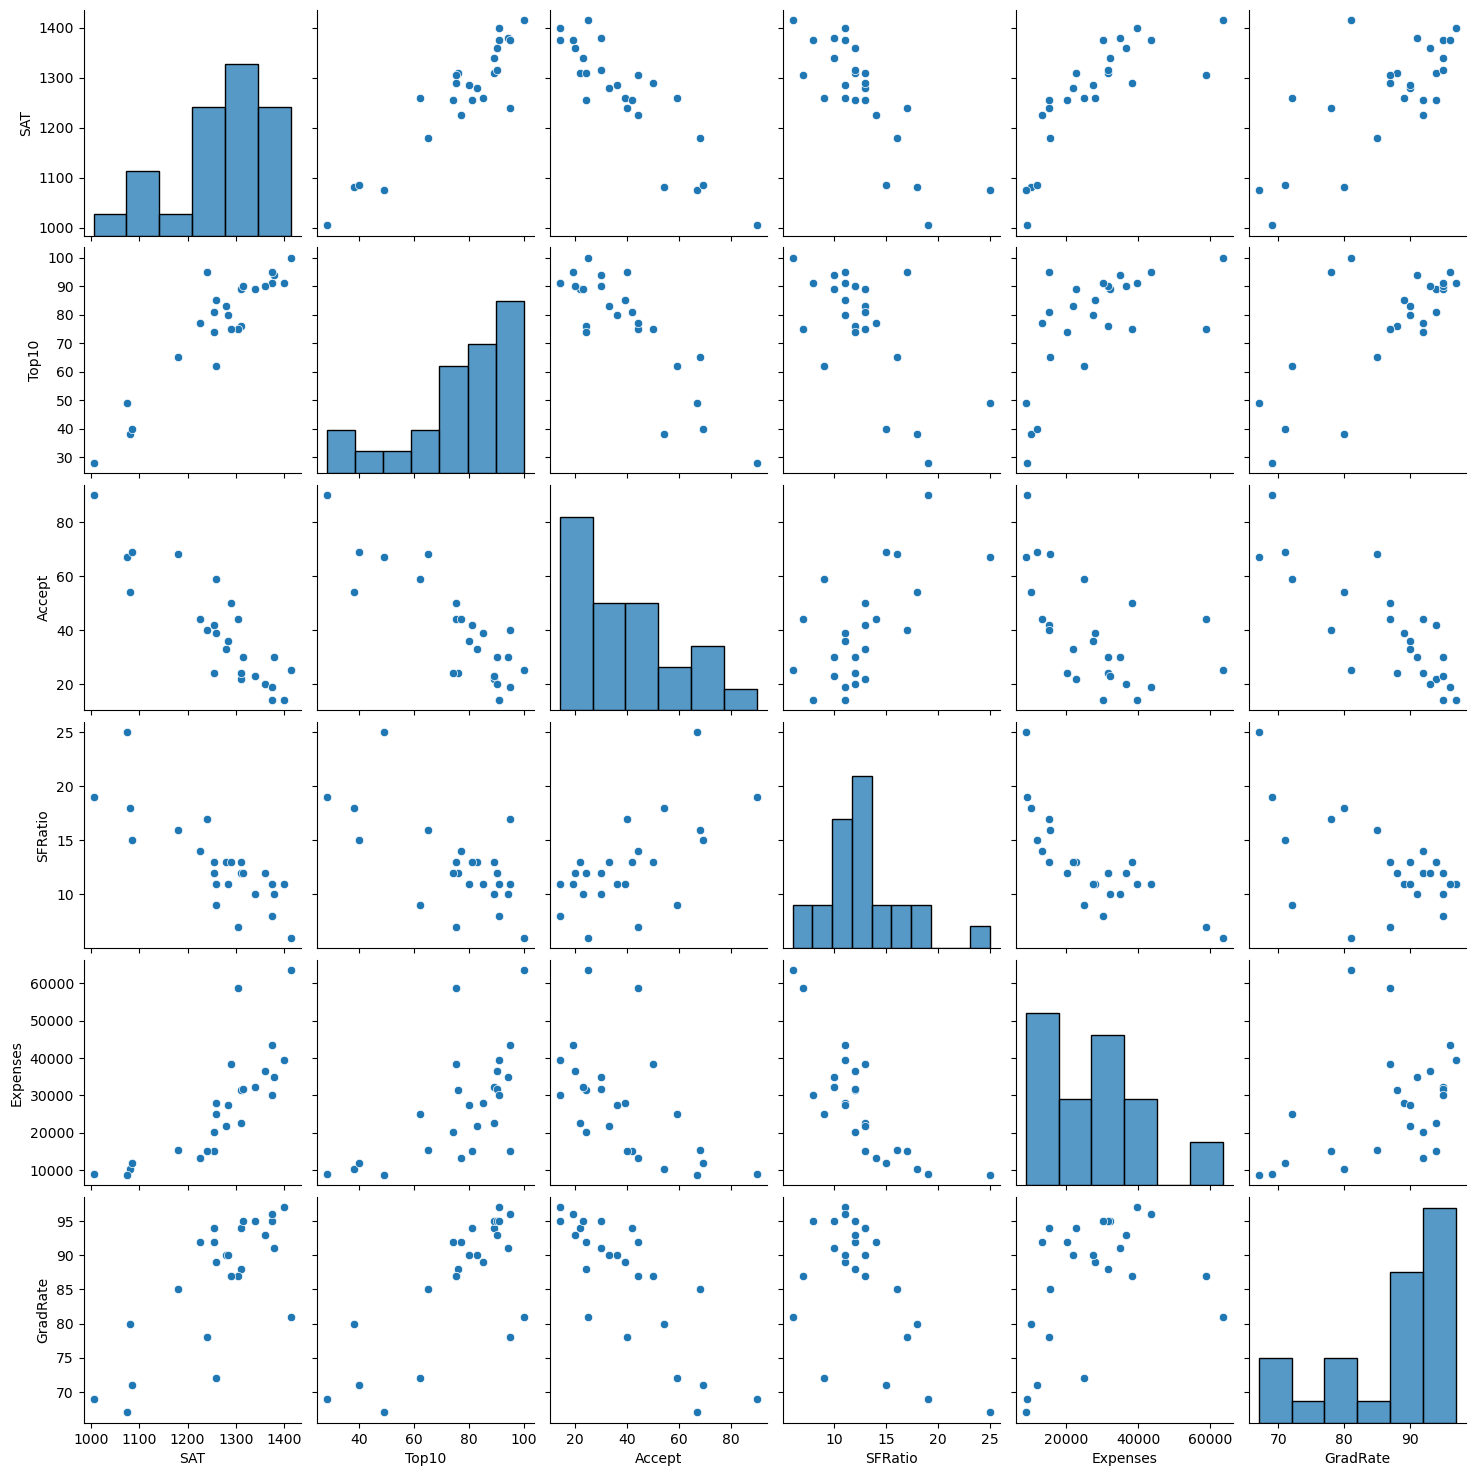

In [213]:
sns.pairplot(data=df)
plt.show();

In [214]:
from scipy.stats import skew

intcol=df.select_dtypes("int64").columns
intcol

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

SAT
-0.8928766081076304


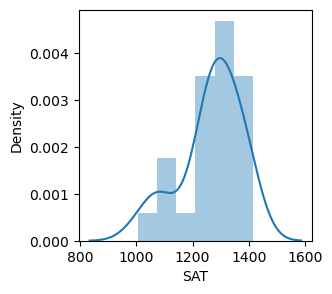

Top10
-1.1453157992392229


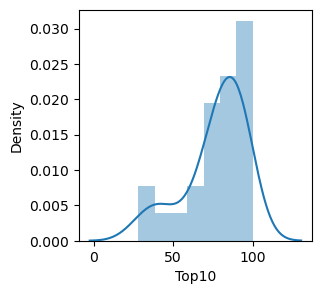

Accept
0.8145930638325511


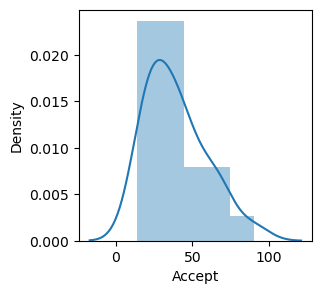

SFRatio
1.0523231507919937


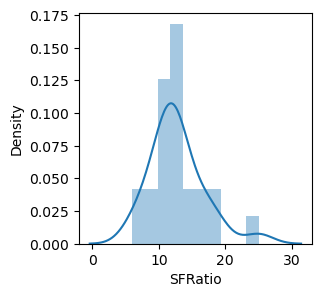

Expenses
0.8003316458276275


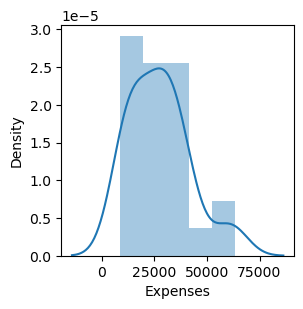

GradRate
-0.9385213617058671


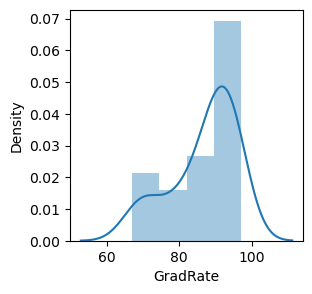

In [215]:
for i in intcol:
    print(i)
    print(skew(df[i]))
    
    plt.figure(figsize=(3,3))
    sns.distplot(df[i])
    plt.show()

In [216]:
df["Accept"]=np.log(df["Accept"])

In [217]:
df["SFRatio"]=np.log(df["SFRatio"])

In [218]:
print(skew(df["Accept"]))
print(skew(df["SFRatio"]))

-0.03450991451108277
-0.04949217049076626


AxesSubplot(0.125,0.11;0.775x0.77)


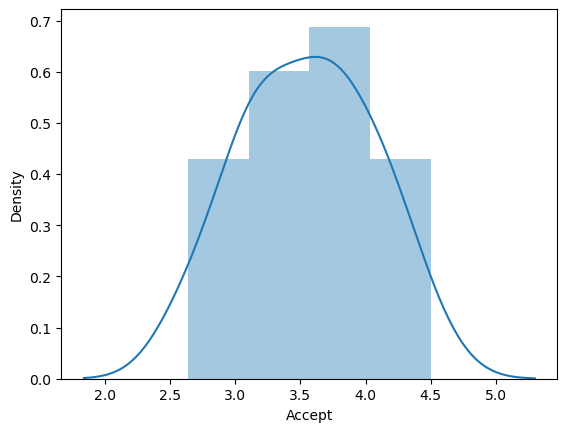

AxesSubplot(0.125,0.11;0.775x0.77)


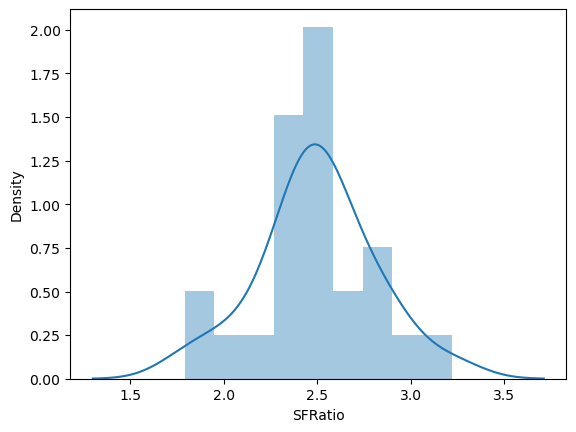

In [219]:

print(sns.distplot(df["Accept"]))
plt.show()

print(sns.distplot(df["SFRatio"]))
plt.show()

In [220]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Univ"]=le.fit_transform(df["Univ"])
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1310,89,3.091042,2.564949,22704,94
1,2,1415,100,3.218876,1.791759,63575,81
2,1,1260,62,4.077537,2.197225,25026,72
3,3,1310,76,3.178054,2.484907,31510,88
4,4,1280,83,3.496508,2.564949,21864,90


In [221]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(df)

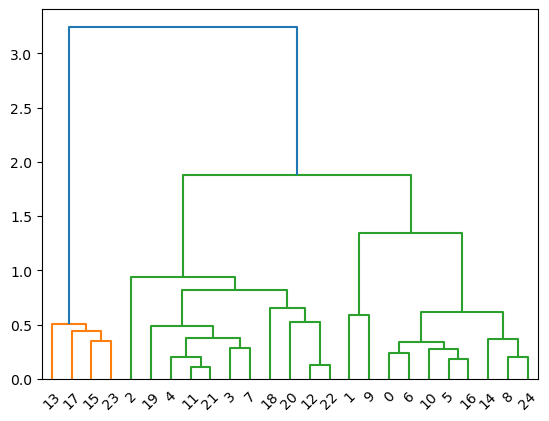

In [222]:
from scipy.cluster import hierarchy as hi
lk = hi.linkage(x,method="ward")
ddg = hi.dendrogram(lk) 
plt.show()

In [223]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=5)
ylabel = hc.fit_predict(x)

In [239]:
df['Outcome'] = ylabel

In [240]:
df['Outcome'].value_counts()

0    10
2     8
3     4
1     2
4     1
Name: Outcome, dtype: int64

In [241]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Outcome
0,0,1310,89,3.091042,2.564949,22704,94,2
1,2,1415,100,3.218876,1.791759,63575,81,1
2,1,1260,62,4.077537,2.197225,25026,72,4
3,3,1310,76,3.178054,2.484907,31510,88,0
4,4,1280,83,3.496508,2.564949,21864,90,0


In [153]:
from sklearn.cluster import KMeans
wcss=[]

In [154]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(k)
    wcss.append(kmeans.inertia_)
    
wcss    

[175.0,
 91.40525170885061,
 67.49700316730365,
 51.214916687723395,
 39.66629226591573,
 30.955592525039158,
 26.41919744512792,
 23.486889161727333,
 20.640455220055472,
 18.215251102200966]

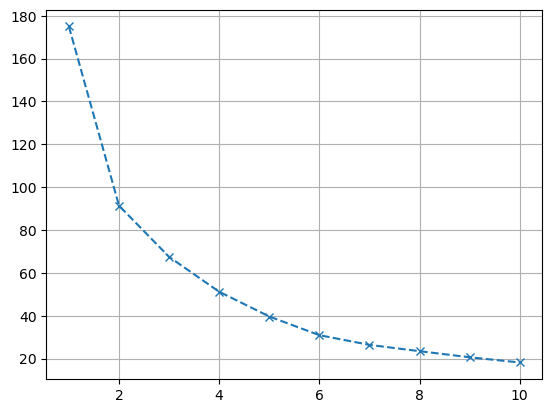

In [155]:
plt.plot(range(1,11),wcss,"x--")
plt.grid()
plt.show()

In [186]:
kmeans=KMeans(n_clusters=4,random_state=0)
ylabel=kmeans.fit_predict(k)
ylabel

array([2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [187]:
df["output"]=ylabel
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,output
0,0,1310,89,3.091042,2.564949,22704,94,2
1,2,1415,100,3.218876,1.791759,63575,81,3
2,1,1260,62,4.077537,2.197225,25026,72,3
3,3,1310,76,3.178054,2.484907,31510,88,2
4,4,1280,83,3.496508,2.564949,21864,90,2


In [188]:
kmeans.cluster_centers_

array([[ 0.69337525, -1.93029211, -1.98148647,  1.37610425,  1.45387078,
        -1.23359906, -1.68680366],
       [ 0.77261813, -0.17502851,  0.1698567 ,  0.5041336 ,  0.32471167,
        -0.39066413,  0.12813205],
       [-0.44123879,  0.65859785,  0.57635604, -0.90112363, -0.27211391,
         0.27826974,  0.73835433],
       [-1.10940039,  0.56726388,  0.13234418,  0.2930026 , -1.69840394,
         1.536026  , -0.75720245]])

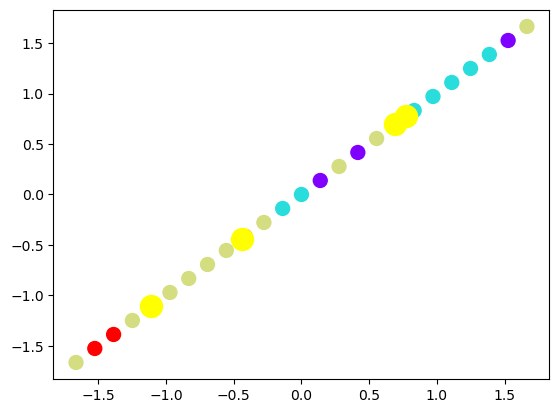

In [189]:
plt.scatter(k[:,0],k[:,0],c=ylabel,s=100,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],c="yellow",s=250)
plt.show()

In [190]:
df['output'].value_counts()

2    11
1     7
0     4
3     3
Name: output, dtype: int64

In [228]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Outcome
0,0,1310,89,3.091042,2.564949,22704,94,2
1,2,1415,100,3.218876,1.791759,63575,81,1
2,1,1260,62,4.077537,2.197225,25026,72,4
3,3,1310,76,3.178054,2.484907,31510,88,0
4,4,1280,83,3.496508,2.564949,21864,90,0
5,5,1340,89,3.135494,2.302585,32162,95,2
6,6,1315,90,3.401197,2.484907,31585,95,2
7,7,1255,74,3.178054,2.484907,20126,92,0
8,8,1400,91,2.639057,2.397895,39525,97,2
9,9,1305,75,3.784190,1.945910,58691,87,1


In [229]:
x = df.iloc[:,1:7]

In [230]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)
x =pd.DataFrame(x)
x.columns = ['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate']
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.242905,0.541785,0.255144,0.900000
1,1.000000,1.000000,0.311604,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.773064,0.284115,0.297461,0.166667
3,0.743902,0.666667,0.289666,0.485698,0.415629,0.700000
4,0.670732,0.763889,0.460808,0.541785,0.239835,0.766667
5,0.817073,0.847222,0.266794,0.357943,0.427512,0.933333
6,0.756098,0.861111,0.409587,0.485698,0.416996,0.933333
7,0.609756,0.638889,0.289666,0.485698,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.424728,0.561699,1.000000
9,0.731707,0.652778,0.615414,0.108015,0.910991,0.666667


In [232]:
feature = x
target = df["Outcome"]

In [233]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.3,random_state=1)

In [234]:
def mymodel(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    #model evaluation
    print(classification_report(ytest, ypred))
    return model

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [236]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.7647058823529411
Testing Accuracy : 0.625


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.42      0.58      0.49         8
weighted avg       0.47      0.62      0.53         8



In [237]:
svm = mymodel(SVC())

Training Accuracy : 0.9411764705882353
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [238]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.875


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.75      0.69      0.71         8
weighted avg       1.00      0.88      0.93         8

